In [6]:
import utils.dataset as dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus'] = False


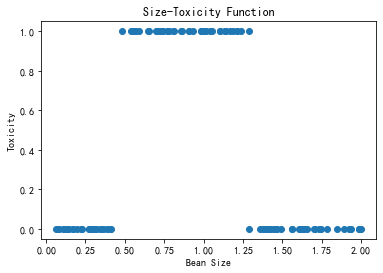

In [7]:
## Create a dataset
n = 100
xs, ys = dataset.get_beans4(n)
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)

含有一层隐藏层的神经网络结构


![20220810173118_2022-08-10](https://cdn.jsdelivr.net/gh/Achuan-2/PicBed@pic/assets/06_one_hidden_layer/20220810173118_2022-08-10.png)


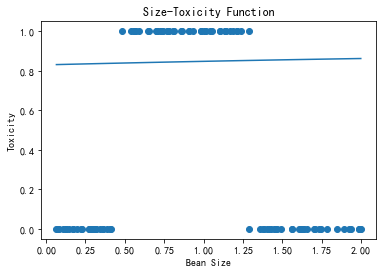

In [52]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():

    # 第一层(隐藏层)
    ## 第一个神经元参数
    w11_1 = np.random.rand()
    b1_1 = np.random.rand()
    ## 第二个神经元参数
    w12_1 = np.random.rand()
    b2_1 = np.random.rand()

    # 第二层(输出层)
    # 只有一个输出神经元
    w11_2 = np.random.rand()
    w21_2 = np.random.rand()
    b1_2 = np.random.rand()
    return w11_1,b1_1,w12_1,b2_1,w11_2,w21_2,b1_2

# 前向传播
def foward_progation(xs):
    z1_1 = w11_1 * xs + b1_1
    a1_1 = sigmoid(z1_1)

    z2_1 = w12_1 * xs + b2_1
    a2_1 = sigmoid(z2_1)

    z1_2 = w11_2 * a1_1 + w21_2*a2_1+b1_2
    a1_2 =  sigmoid(z1_2)
    return a1_2,z1_2,a2_1,z2_1,a1_1,z1_1


w11_1,b1_1,w12_1,b2_1,w11_2,w21_2,b1_2 = init_network()
a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = foward_progation(xs)

fig = plt.figure()
fig.set_facecolor('white')
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)
plt.plot(xs,a1_2)
plt.savefig('./output/06/初始.png', dpi=200)


# 动画展示过程

![20220810200910_2022-08-10](https://cdn.jsdelivr.net/gh/Achuan-2/PicBed@pic/assets/06_one_hidden_layer/20220810200910_2022-08-10.png)
按部就班求梯度
$$
\begin{aligned}
\frac{de}{dw_{11\_2}} &= \frac{de}{da_{1\_2}} \cdot \frac{da_{1\_2}}{dz_{1\_2}} \cdot \frac{dz_{1\_2}}{dw_{11\_2}}\\  
\frac{de}{dw_{21\_2}} &= \frac{de}{da_{1\_2}} \cdot \frac{da_{1\_2}}{dz_{1\_2}} \cdot \frac{dz_{1\_2}}{dw_{21\_2}}\\  
\frac{de}{db_{1\_2}} &= \frac{de}{da_{1\_2}} \cdot \frac{da_{1\_2}}{dz_{1\_2}} \cdot \frac{dz_{1\_2}}{db_{1\_2}}\\  
\frac{de}{dw_{11\_1}} &= \frac{de}{da_{1\_2}} \cdot \frac{da_{1\_2}}{dz_{1\_2}} \cdot \frac{dz_{1\_2}}{da_{1\_1}} \cdot \frac{da_{1\_1}}{dz_{1\_1}} \cdot \frac{dz_{1\_1}}{dw_{11\_1}}\\  
\frac{de}{db_{1\_1}} &= \frac{de}{da_{1\_2}}  \cdot \frac {da_{1\_2}}{dz_{1\_2}}  \cdot \frac {dz_{1\_2}}{da_{1\_1}}  \cdot \frac {da_{1\_1}}{dz_{1\_1}}  \cdot \frac {dz_{1\_1}}{db_{1\_1}}\\  
\frac{de}{dw_{12\_1}} &= \frac{de}{da_{1\_2}} \cdot \frac{da_{1\_2}}{dz_{1\_2}} \cdot \frac{dz_{1\_2}}{da_{1\_1}} \cdot \frac{da_{2\_1}}{dz_{2\_1}} \cdot \frac{dz_{2\_1}}{dw_{12\_1}}\\  
\frac{de}{db_{2\_1}} &= \frac{de}{da_{1\_2}}  \cdot \frac {da_{1\_2}}{dz_{1\_2}}  \cdot \frac {dz_{1\_2}}{da_{1\_1}}  \cdot \frac {da_{2\_1}}{dz_{2\_1}}  \cdot \frac {dz_{2\_1}}{db_{2\_1}}
\end{aligned}
$$
更新参数，反向传播
$$
\begin{aligned}
w_{11\_2} &= w_{11\_2} - \alpha \cdot \frac{de}{dw_{11\_2}} \\ 
w_{21\_2} &= w_{21\_2} - \alpha \cdot \frac{de}{dw_{21\_2}} \\ 
b_{1\_2} &= b_{1\_2} - \alpha \cdot \frac{de}{db_{1\_2}} \\
w_{11\_1} &= w_{11\_1} - \alpha \cdot \frac{de}{dw_{11\_1}} \\
b_{1\_1} &= b_{1\_1} - \alpha \cdot \frac{de}{db_{1\_1}} \\ 
w_{12\_1} &= w_{12\_1} - \alpha \cdot \frac{de}{dw_{12\_1}} \\ 
b_{2\_1} &= b_{2\_1} - \alpha \cdot \frac{de}{db_{2\_1}} \\ 
\end{aligned}
$$

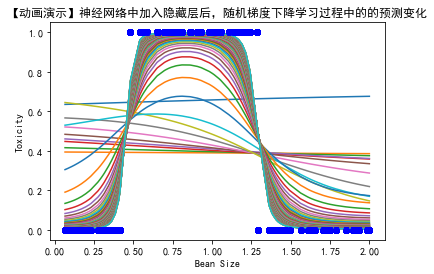

In [56]:
w11_1, b1_1, w12_1, b2_1, w11_2, w21_2, b1_2 = init_network()
alpha = 0.03
ims = []

fig = plt.figure()
for _ in range(5000):
    for i in range(n):
        x = xs[i]
        y = ys[i]
        # 先来一次前向传播
        a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = foward_progation(x)

        # 反向传播
        e = (y-a1_2)**2
        deda1_2 = -2*(y-a1_2)
        da1_2dz1_2 = a1_2*(1-a1_2)
        dz1_2dw11_2 = a1_1
        dz1_2dw21_2 = a2_1
        dz1_2db1_2 = 1

        dedw11_2 = deda1_2*da1_2dz1_2*dz1_2dw11_2
        dedw21_2 = deda1_2*da1_2dz1_2*dz1_2dw21_2
        dedb1_2 = deda1_2*da1_2dz1_2*dz1_2db1_2

        dz1_2da1_1 = w11_2
        da1_1dz1_1 = a1_1 * (1 - a1_1)
        dz1_1dw11_1 = x
        dz1_1db1_1 = 1
        dedw11_1 = deda1_2*da1_2dz1_2*dz1_2da1_1*da1_1dz1_1*dz1_1dw11_1
        dedb1_1 = deda1_2 * da1_2dz1_2 * dz1_2da1_1 * da1_1dz1_1 * dz1_1db1_1

        dz1_2d2_1 = w21_2
        da2_1dz2_1 = a2_1 * (1 - a2_1)
        dz2_1dw12_1 = x
        dz2_1db2_1 = 1
        dedw12_1 = deda1_2*da1_2dz1_2*dz1_2da1_1*da2_1dz2_1*dz2_1dw12_1
        dedb2_1 = deda1_2 * da1_2dz1_2 * dz1_2da1_1 * da2_1dz2_1 * dz2_1db2_1

        w11_1 = w11_1 - alpha * dedw11_1
        w12_1 = w12_1 - alpha * dedw12_1
        b1_1 = b1_1 - alpha * dedb1_1
        b2_1 = b2_1 - alpha * dedb2_1
        w11_2 = w11_2 - alpha * dedw11_2
        w21_2 = w21_2 - alpha * dedw21_2
        b1_2 = b1_2 - alpha * dedb1_2
    if _ % 50 == 0:
        a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = foward_progation(xs)
        im = plt.plot(xs, a1_2) + plt.plot(xs, ys, 'o', color="blue")
        ims.append(im)

fig.set_facecolor('white')
plt.title('【动画演示】神经网络中加入隐藏层后，随机梯度下降学习过程中的的预测变化')
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.savefig('./output/06/隐藏层.png', dpi=200)


In [50]:
ani = animation.ArtistAnimation(fig, ims, interval=70, repeat_delay=1000)
ani.save("./output/06/隐藏层.gif", writer='pillow', dpi=200)


![](./output/06/隐藏层.gif)

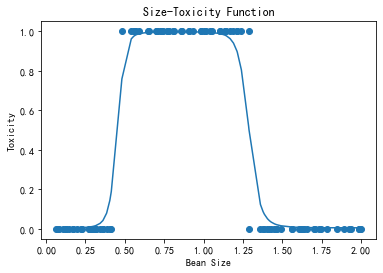

In [57]:
a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = foward_progation(xs)
fig = plt.figure()
fig.set_facecolor('white')
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)
plt.plot(xs, a1_2)

plt.savefig("./output/06/隐藏层结果.png",dpi=200)
plt.show()
